In [3]:
# Dependencies
import requests, pprint
import json, os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data_file = 'Resources/Employment_Data.csv'
employment_data = pd.read_csv(data_file)
employment_data.head()


,Year,Period,labor force,employment,unemployment,unemployment rate
0,2008,Jan,18033755(S),16959230(S),1074525(S),6.0(S)
1,2008,Feb,18055339(S),16957546(S),1097793(S),6.1(S)
2,2008,Mar,18079265(S),16950002(S),1129263(S),6.2(S)
3,2008,Apr,18107051(S),16936408(S),1170643(S),6.5(S)
4,2008,May,18139327(S),16918510(S),1220817(S),6.7(S)


In [5]:
employment_data.columns


Index(['Year', 'Period', 'labor force', 'employment', 'unemployment',
       'unemployment rate'],
      dtype='object')

In [6]:
# function to clean the extra string '(S)' from the end of columns
def clean_data (column, string):
    employment_data[column] = employment_data[column].str.replace( string , '')    


In [7]:
#calling cleaning data function to clean labor force
clean_data ( 'labor force', 'S')
clean_data ( 'labor force', '(')
clean_data ( 'labor force', ')')
clean_data ( 'labor force', 'P')
clean_data ( 'labor force', 'B')

In [8]:
#calling cleaning data function to clean employed
clean_data ( 'employment', 'S')
clean_data ( 'employment', '(')
clean_data ( 'employment', ')')
clean_data ( 'employment', 'P')
clean_data ( 'employment', 'B')

In [9]:
#calling cleaning data function to clean unemployed
clean_data ( 'unemployment', 'S')
clean_data ( 'unemployment', '(')
clean_data ( 'unemployment', ')')
clean_data ( 'unemployment', 'P')
clean_data ( 'unemployment', 'B')

In [10]:
employment_data.head()

,Year,Period,labor force,employment,unemployment,unemployment rate
0,2008,Jan,18033755,16959230,1074525,6.0(S)
1,2008,Feb,18055339,16957546,1097793,6.1(S)
2,2008,Mar,18079265,16950002,1129263,6.2(S)
3,2008,Apr,18107051,16936408,1170643,6.5(S)
4,2008,May,18139327,16918510,1220817,6.7(S)


In [11]:
employment_data.dtypes

Year                  int64
Period               object
labor force          object
employment           object
unemployment         object
unemployment rate    object
dtype: object

In [12]:
# changing the data types from string to float
employment_data['employment'] = employment_data['employment'].astype(float)
employment_data['unemployment'] = employment_data['unemployment'].astype(float)
employment_data['labor force'] = employment_data['labor force'].astype(float)

In [13]:
# calculating the rate of unemployment
employment_data['unemployment rate2'] =  round( employment_data['unemployment']/employment_data['labor force']*100, 1)
employment_data.head()

,Year,Period,labor force,employment,unemployment,unemployment rate,unemployment rate2
0,2008,Jan,18033755.0,16959230.0,1074525.0,6.0(S),6.0
1,2008,Feb,18055339.0,16957546.0,1097793.0,6.1(S),6.1
2,2008,Mar,18079265.0,16950002.0,1129263.0,6.2(S),6.2
3,2008,Apr,18107051.0,16936408.0,1170643.0,6.5(S),6.5
4,2008,May,18139327.0,16918510.0,1220817.0,6.7(S),6.7


In [14]:

group_data = employment_data[['Year', 'unemployment rate2']]
group_data = group_data.groupby('Year')
group_data = group_data['unemployment rate2'].mean()



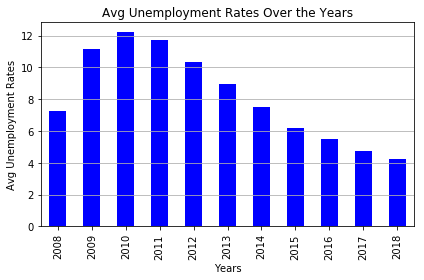

In [15]:
group_data.plot(kind='bar', color ='b')
plt.title( 'Avg Unemployment Rates Over the Years')
plt.xlabel('Years')
plt.ylabel('Avg Unemployment Rates')
plt.grid(axis='y')

plt.tight_layout()
plt.savefig('Resources/Avg Unemployment Rates Over the Years')

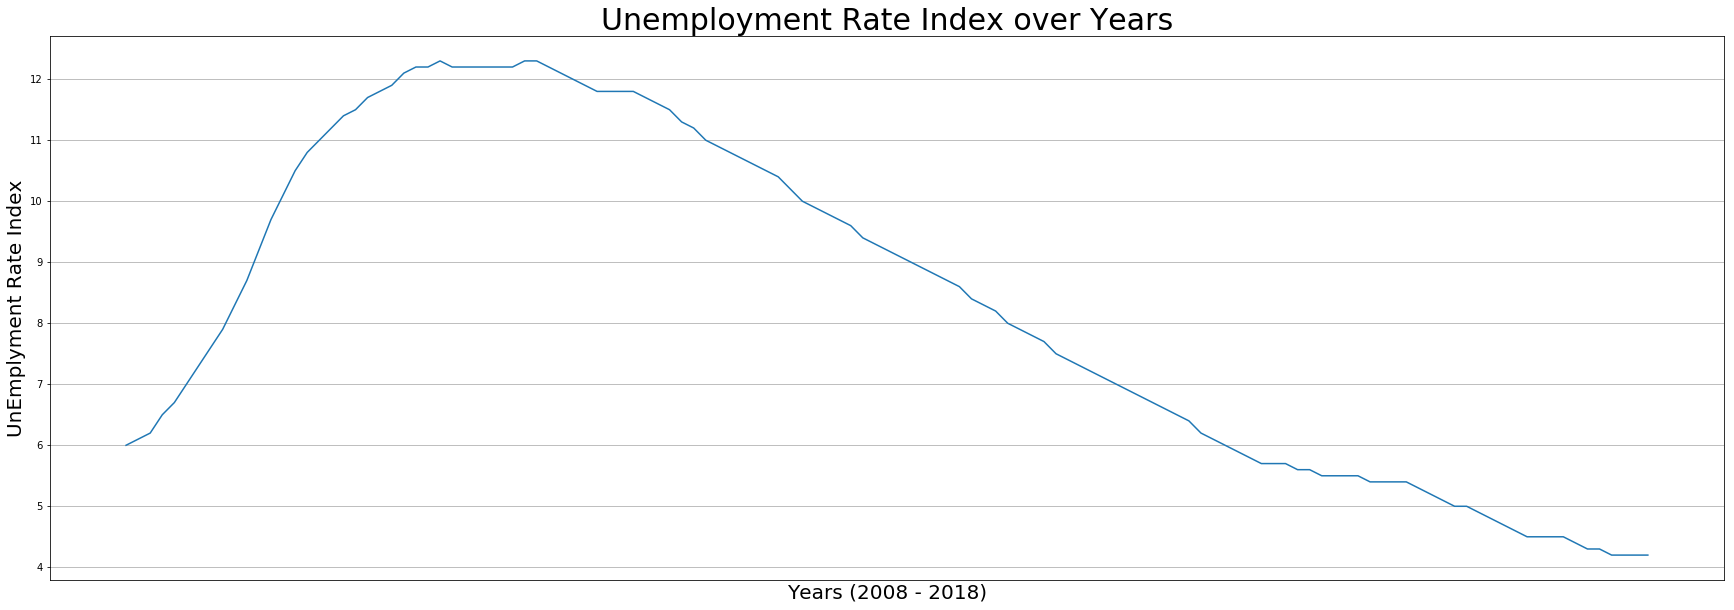

In [17]:
from matplotlib import dates as mdates

y = employment_data['unemployment rate2']
fig = plt.figure(figsize=(30,10))
ax = plt.subplot(111)
plt.plot(y )

years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

ax.grid(axis='y')
ax.set_title('Unemployment Rate Index over Years', fontsize=30)
ax.set_ylabel('UnEmplyment Rate Index', fontsize=20)
ax.set_xlabel('Years (2008 - 2018)',fontsize=20)
plt.savefig('Resources/Unemployment Rate Index over Years')
plt.show()

In [18]:
# calculating the rate of employment
employment_data['employment rate'] =  round( employment_data['employment']/employment_data['labor force']*100, 1)
employment_data.head()

,Year,Period,labor force,employment,unemployment,unemployment rate,unemployment rate2,employment rate
0,2008,Jan,18033755.0,16959230.0,1074525.0,6.0(S),6.0,94.0
1,2008,Feb,18055339.0,16957546.0,1097793.0,6.1(S),6.1,93.9
2,2008,Mar,18079265.0,16950002.0,1129263.0,6.2(S),6.2,93.8
3,2008,Apr,18107051.0,16936408.0,1170643.0,6.5(S),6.5,93.5
4,2008,May,18139327.0,16918510.0,1220817.0,6.7(S),6.7,93.3


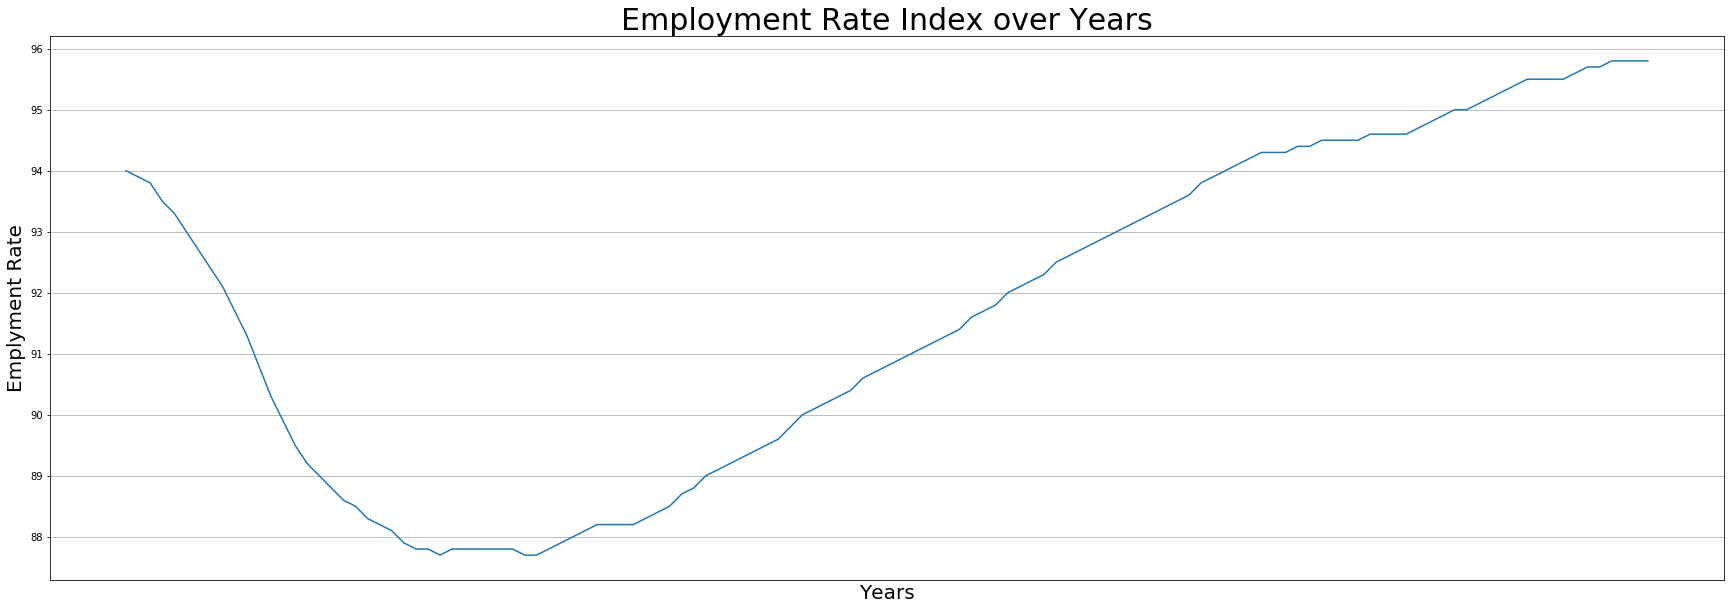

In [20]:
from matplotlib import dates as mdates

y = employment_data['employment rate']

fig = plt.figure(figsize=(30,10))
ax = plt.subplot(111)
plt.plot(y )

years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

ax.set_title('Employment Rate Index over Years',fontsize=30)
ax.grid(axis='y')
ax.set_ylabel('Emplyment Rate',fontsize=20)
ax.set_xlabel('Years',fontsize=20)

plt.savefig('Resources/Employment Rate Index over Years')

plt.show()